# <b>다이아몬드 데이터셋 분석

### <b>데이터 셋 설명
 1. caret weight : 케럿 무게 (200mg)
 2. cut : 커팅 품질 - (Fair < Good < Very Good < signaiture-ideal < ideal)
 3. color : 다이아몬드의 색상 - (D < E < F < G < H < I)
 4. Clarity : 다이아몬드의 투명도 - (FL < IF < VVS1 < VVS2 < VS1 < VS2 < Sl1) 
 5. Polish : 다이아몬드의 연마상태 - (Good < Very Good < Excellent < Ideal)
 6. Symmetry : 다이아몬드의 대칭성 - (Good < Very Good < Excellent < Ideal)
 7. report : 해당 다이아몬드를 보증하는 품질문서	-> GIA, AGSL, 등의 규격이 있음

In [95]:
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

### <b>데이터 전처리

In [46]:
# 데이터 전처리
# 데이터 불러오기
df = pd.read_excel('C:\\Users\\User\\Desktop\\diamond.xlsx')
df.drop("index", axis = 1, inplace = True)

# object to category type 
df["Cut"] = df["Cut"].astype("category", )
df["Color"] = df["Color"].astype("category")
df["Clarity"] = df["Clarity"].astype("category")
df["Polish"] = df["Polish"].astype("category")
df["Symmetry"] = df["Symmetry"].astype("category")
df["Report"] = df["Report"].astype("category")

# fill Nan report value
df["Report"] = df["Report"].astype("string")
df["Report"].fillna("No Report", inplace = True)
df["Report"] = df["Report"].astype("category")
print(df.head())
print(df.describe())

   Carat Weight    Cut Color Clarity Polish Symmetry Report  Price
0          1.10  Ideal     H     SI1     VG       EX    GIA   5169
1          0.83  Ideal     H     VS1     ID       ID   AGSL   3470
2          0.85  Ideal     H     SI1     EX       EX    GIA   3183
3          0.91  Ideal     E     SI1     VG       VG    GIA   4370
4          0.83  Ideal     G     SI1     EX       EX    GIA   3171
       Carat Weight          Price
count   6000.000000    6000.000000
mean       1.334520   11791.579333
std        0.475696   10184.350051
min        0.750000    2184.000000
25%        1.000000    5150.500000
50%        1.130000    7857.000000
75%        1.590000   15036.500000
max        2.910000  101561.000000


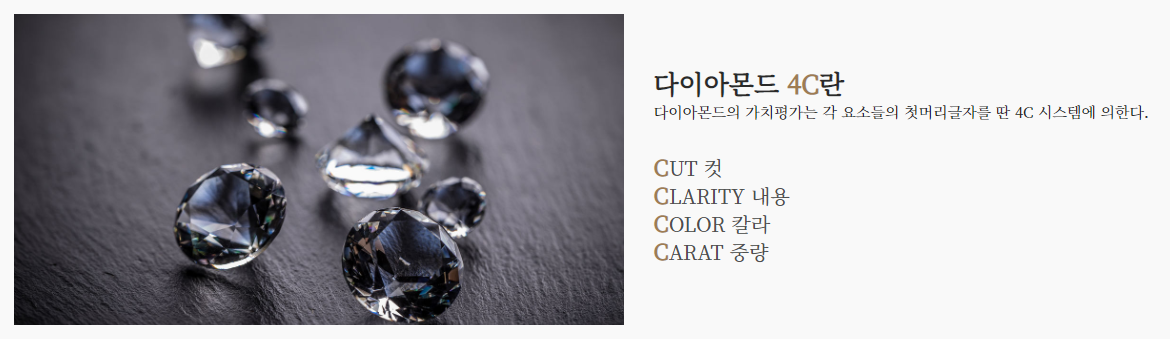

In [28]:
Image("C:\\Users\\User\\Desktop\\다이아몬드.png")

## 기존의 다이아몬드 가치평가는 CUT, CLARITY, COLOR, CARAT을 위주로 평가를 하는 시스템이다

## 데이터 EDA

Text(0.5, 1.0, 'Price & Caret')

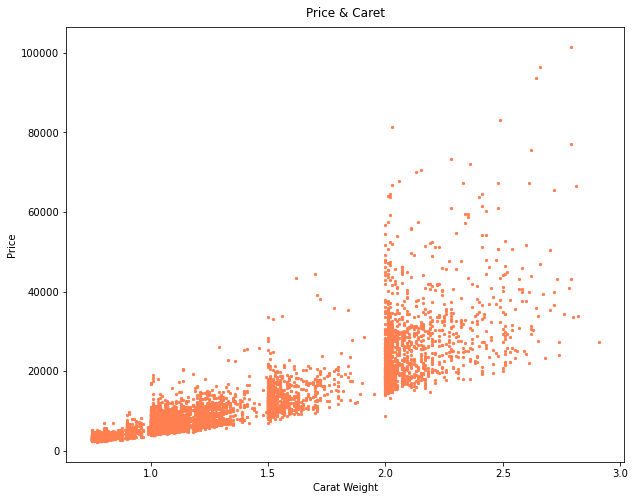

In [93]:
df.plot(kind = "scatter", x = "Carat Weight", y = "Price", c = "coral", s= 5, figsize = (10,8))
plt.title("Price & Caret", pad = 10)

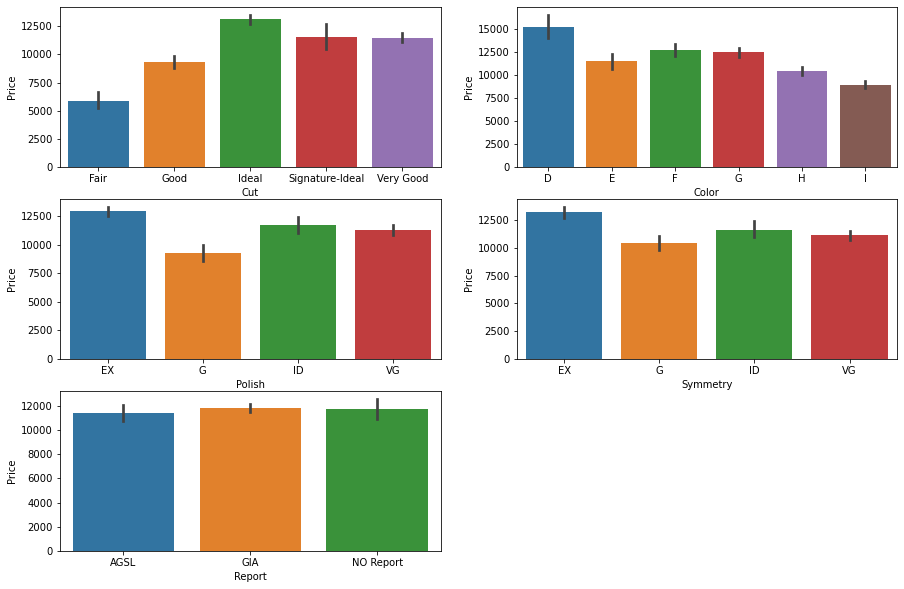

In [96]:
plt.figure(figsize=[15,10])

plt.subplot(3,2,1)
temp = sns.barplot(x = df["Cut"], y = df["Price"])
plt.subplot(3,2,2)
temp = sns.barplot(x = df["Color"], y = df["Price"])
plt.subplot(3,2,3)
temp = sns.barplot(x = df["Polish"], y = df["Price"])
plt.subplot(3,2,4)
temp = sns.barplot(x = df["Symmetry"], y = df["Price"])
plt.subplot(3,2,5)
temp = sns.barplot(x = df["Report"], y = df["Price"])
plt.show()